# <span style="color:blue"> Numerical Simulation Laboratory (NSL) </span>
    
##  <span style="color:blue"> Edoardo Baraldi - Notebook 12</span>  

### Exercise 12.1

<span style="color:red">Change at will and train your DNN by increasing the number of epochs to an adeuqate value</span>. Try to use at least two other optimizers, different from SGD: <span style="color:red">watch to accuracy and loss for training and validation data and comment on the performances</span>.

### Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that **<span style="color:red">you should complete</span>**:

Train your DCNN and evaluate its performance proceeding exactly as before:

### Exercise 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

For example, you can use the following code to import a picture of an handwritten digit
(Note: you should install Python Image Library (PIL/Pillow):

## Exercise 12.1

In [17]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [18]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


#### Reshape data and convert labels to be used with categorical cross entropy

X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 9


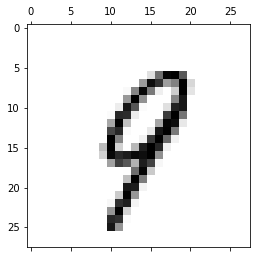

... and with label [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [19]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[22])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[22,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[22], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

#### Define the Neural Net and its Architecture

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(50, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


### 1) Optimizer Function: Adadelta 

In [45]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


#### Train the model

In [46]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 2.2331 - acc: 0.1791 - val_loss: 2.1224 - val_acc: 0.3502
Epoch 2/20
1875/1875 [==============================] - 8s 5ms/step - loss: 2.0985 - acc: 0.2776 - val_loss: 1.9856 - val_acc: 0.5200
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9765 - acc: 0.3610 - val_loss: 1.8427 - val_acc: 0.6140
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 1.8576 - acc: 0.4211 - val_loss: 1.7003 - val_acc: 0.6827
Epoch 5/20
1875/1875 [==============================] - 8s 5ms/step - loss: 1.7438 - acc: 0.4656 - val_loss: 1.5640 - val_acc: 0.7264
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 1.6455 - acc: 0.5028 - val_loss: 1.4398 - val_acc: 0.7576
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5476 - acc: 0.5328 - val_loss: 1.3245 - val_acc: 0.7813
Epoch 8/20
1875/1875 [==============================] - 9s 5ms

#### Evaluate the Model Performance on the *Unseen* Test Data

313/313 [==============================] - 1s 2ms/step - loss: 0.6186 - acc: 0.8822

Test loss: 0.6185621619224548
Test accuracy: 0.8822000026702881


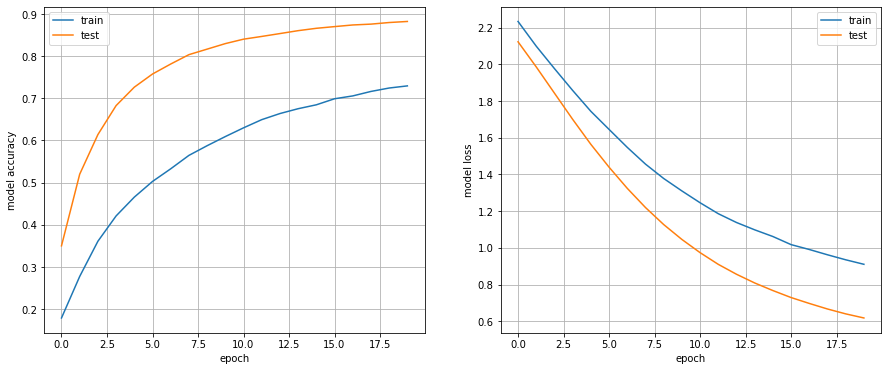

In [47]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15 , 6))

# summarize history for accuracy
ax0.plot(history.history['acc'])
ax0.plot(history.history['val_acc'])
ax0.set_ylabel('model accuracy')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test'], loc='best')
ax0.grid()

# summarize history for loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_ylabel('model loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')
ax1.grid()
plt.show()

313/313 [==============================] - 1s 2ms/step


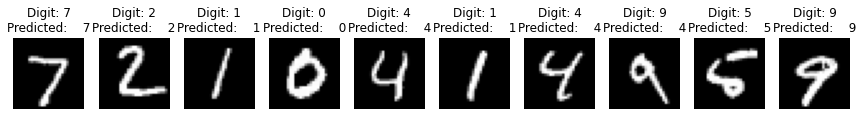

In [48]:
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### 2) Optimizer Function: Adagrad

In [57]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adagrad(learning_rate=0.01, epsilon=None, decay=0.0),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


#### Train the model

In [58]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6134 - acc: 0.8159 - val_loss: 0.2202 - val_acc: 0.9368
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3032 - acc: 0.9176 - val_loss: 0.1522 - val_acc: 0.9538
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2302 - acc: 0.9383 - val_loss: 0.1225 - val_acc: 0.9626
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1914 - acc: 0.9486 - val_loss: 0.1065 - val_acc: 0.9671
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1641 - acc: 0.9563 - val_loss: 0.1014 - val_acc: 0.9690
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1435 - acc: 0.9621 - val_loss: 0.0918 - val_acc: 0.9719
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1269 - acc: 0.9668 - val_loss: 0.0860 - val_acc: 0.9741
Epoch 8/20
1875/1875 [==============================] - 7s 4ms

#### Evaluate the Model Performance on the *Unseen* Test Data

313/313 [==============================] - 1s 2ms/step - loss: 0.0699 - acc: 0.9815

Test loss: 0.06988111883401871
Test accuracy: 0.9815000295639038


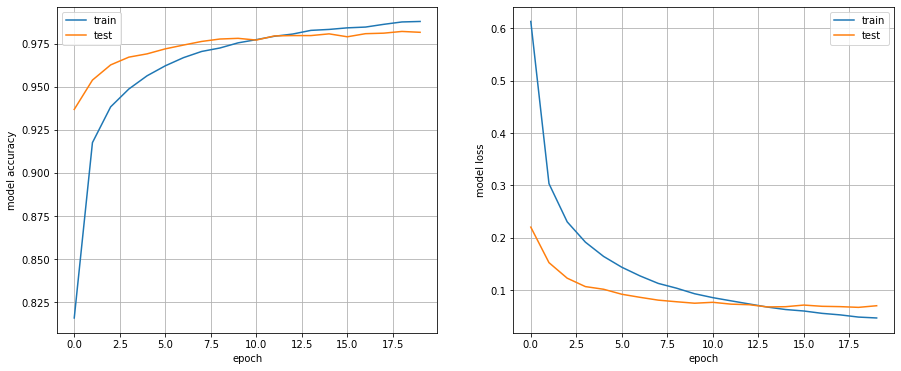

In [59]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15 , 6))

# summarize history for accuracy
ax0.plot(history.history['acc'])
ax0.plot(history.history['val_acc'])
ax0.set_ylabel('model accuracy')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test'], loc='best')
ax0.grid()

# summarize history for loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_ylabel('model loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')
ax1.grid()
plt.show()

313/313 [==============================] - 1s 2ms/step


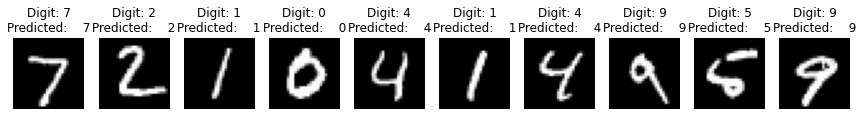

In [60]:
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### 3) Optimizer Function: Adam

In [67]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07,),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


#### Train the model

In [68]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3258 - acc: 0.9086 - val_loss: 0.1426 - val_acc: 0.9577
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1378 - acc: 0.9641 - val_loss: 0.1191 - val_acc: 0.9646
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0985 - acc: 0.9737 - val_loss: 0.0956 - val_acc: 0.9740
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0754 - acc: 0.9793 - val_loss: 0.0836 - val_acc: 0.9778
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0628 - acc: 0.9832 - val_loss: 0.0823 - val_acc: 0.9781
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0555 - acc: 0.9850 - val_loss: 0.0890 - val_acc: 0.9764
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0461 - acc: 0.9870 - val_loss: 0.0860 - val_acc: 0.9793
Epoch 8/20
1875/1875 [==============================] - 7s 4ms

#### Evaluate the Model Performance on the *Unseen* Test Data

313/313 [==============================] - 1s 2ms/step - loss: 0.1477 - acc: 0.9826

Test loss: 0.14769674837589264
Test accuracy: 0.9825999736785889


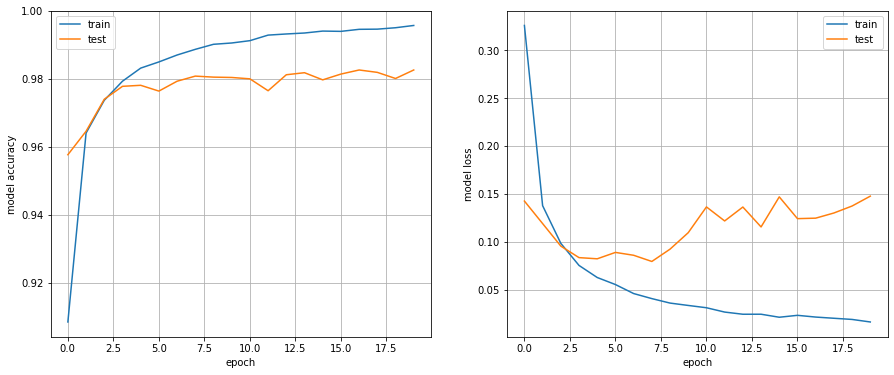

In [69]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15 , 6))

# summarize history for accuracy
ax0.plot(history.history['acc'])
ax0.plot(history.history['val_acc'])
ax0.set_ylabel('model accuracy')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test'], loc='best')
ax0.grid()

# summarize history for loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_ylabel('model loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')
ax1.grid()
plt.show()

313/313 [==============================] - 1s 2ms/step


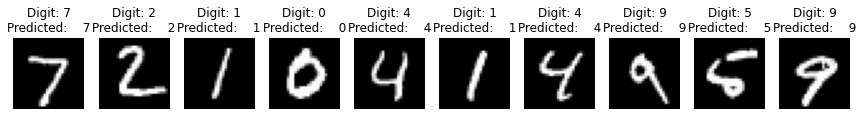

In [70]:
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### 4) Optimizer Function: SGD

In [78]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


#### Train the model

In [79]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9027 - acc: 0.7222 - val_loss: 0.3073 - val_acc: 0.9142
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4239 - acc: 0.8794 - val_loss: 0.2245 - val_acc: 0.9343
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3277 - acc: 0.9096 - val_loss: 0.1847 - val_acc: 0.9462
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2733 - acc: 0.9254 - val_loss: 0.1576 - val_acc: 0.9533
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2371 - acc: 0.9352 - val_loss: 0.1405 - val_acc: 0.9576
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2091 - acc: 0.9427 - val_loss: 0.1255 - val_acc: 0.9618
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1840 - acc: 0.9492 - val_loss: 0.1119 - val_acc: 0.9641
Epoch 8/20
1875/1875 [==============================] - 6s 3ms

#### Evaluate the Model Performance on the *Unseen* Test Data

313/313 [==============================] - 1s 2ms/step - loss: 0.0719 - acc: 0.9785

Test loss: 0.07194658368825912
Test accuracy: 0.9785000085830688


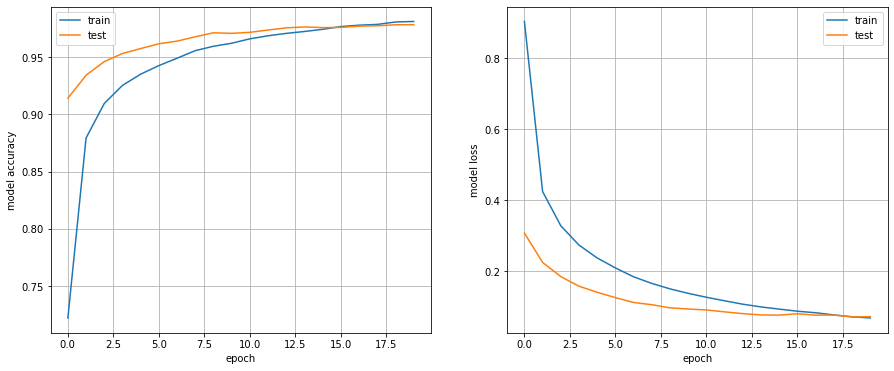

In [80]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15 , 6))

# summarize history for accuracy
ax0.plot(history.history['acc'])
ax0.plot(history.history['val_acc'])
ax0.set_ylabel('model accuracy')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test'], loc='best')
ax0.grid()

# summarize history for loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_ylabel('model loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')
ax1.grid()
plt.show()

313/313 [==============================] - 1s 2ms/step


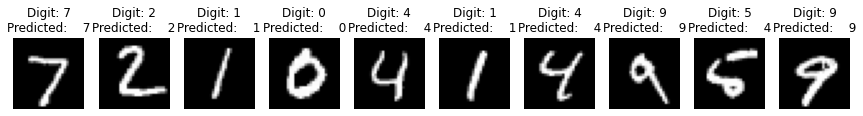

In [81]:
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

La rete neurale creata con tre layers densi rispettivamente di 400, 100 e 50 neuroni oltre ad un Dropout con un rate del 50% è stato testato con diversi ottimizzatori: Adadelta, Adagrad, Adam e lo Stochastic Gradient Descent. Per tutti gli ottimizzatori del modello ho scelto di impostare 20 epoche composte da 32 batch su cui allenare la rete. Tra i risutati ottenuti quelli di Adam e Adagrad sono gli unici che mostrano un evidente overfitting dell'accuracy e della loss con il variare delle epoche. L'ottimizzatore di Adadelta invece presenta un underfitting con i valori ottenuti dai dati di allenamento ben inferiori a quelli ottenuti sui dati di test. Lo SGD è risulatto quindi l'unico in grado di dare risultati consistenti e validi. A grandi epoche (>15) è comunque presente un piccolo overfitting, nel complesso però il SGD è risultato essere il più adeguato tra gli ottimizzatori per questo problema, ho quindi deciso di utilizzarlo nell'analisi successiva.

## Exercise 12.2

#### Creating Convolutional Neural Nets with Keras

In [21]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


#### Define the Neural Net and its Architecture

In [22]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(7, 7),
                     activation='relu',
                     input_shape=input_shape))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # add a convolution layer with 20 filters
    model.add(Conv2D(20, kernel_size=(3, 3),
                     activation='relu',))
    # apply a pooliing with dimension 4x4
    model.add(MaxPooling2D(pool_size=(4, 4)))
    # apply a standard flat layer
    model.add(Flatten())
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


#### Train the model

In [23]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_CNN = create_CNN()

# train DNN and store training info in history
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20


2023-06-05 12:51:53.474093: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 21s 11ms/step - loss: 0.5735 - acc: 0.8205 - val_loss: 0.2688 - val_acc: 0.9309
Epoch 2/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2401 - acc: 0.9283 - val_loss: 0.1681 - val_acc: 0.9552
Epoch 3/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1781 - acc: 0.9473 - val_loss: 0.1350 - val_acc: 0.9640
Epoch 4/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1498 - acc: 0.9548 - val_loss: 0.1176 - val_acc: 0.9712
Epoch 5/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1343 - acc: 0.9594 - val_loss: 0.1050 - val_acc: 0.9714
Epoch 6/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1219 - acc: 0.9624 - val_loss: 0.0942 - val_acc: 0.9745
Epoch 7/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1126 - acc: 0.9662 - val_loss: 0.0817 - val_acc: 0.9782
Epoch 8/20
1875/1875 [==============================] - 20s

#### Evaluate the Model Performance on the *Unseen* Test Data

313/313 [==============================] - 1s 3ms/step - loss: 0.0573 - acc: 0.9847

Test loss: 0.05730758234858513
Test accuracy: 0.9847000241279602


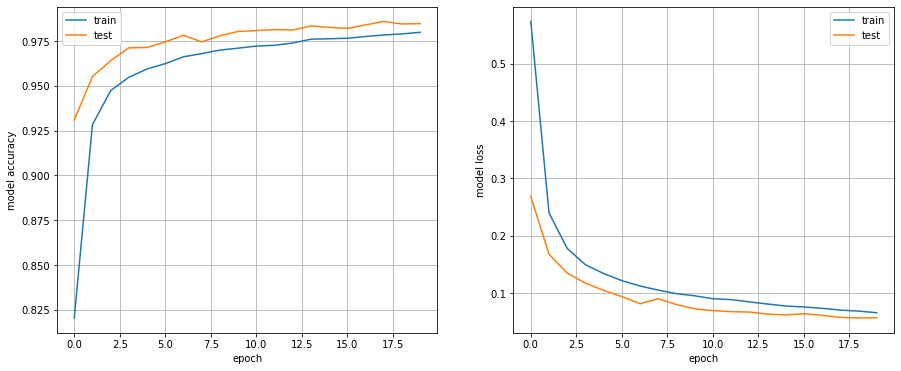

In [24]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15 , 6))

# summarize history for accuracy
ax0.plot(history.history['acc'])
ax0.plot(history.history['val_acc'])
ax0.set_ylabel('model accuracy')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test'], loc='best')
ax0.grid()

# summarize history for loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_ylabel('model loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')
ax1.grid()
plt.show()

313/313 [==============================] - 1s 3ms/step


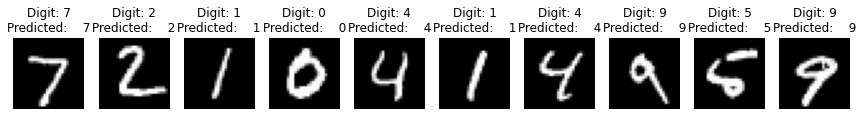

In [25]:
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Ho creato una nuova rete neurale basato su layer di convoluzione, in particolare dei layer di convoluzione 2d. La rete neurale è composto così da un'inziale layer di convoluzione di 10 filtri 7x7 seguito da un Dropout con un rate del 50%, un'atro layer di convoluzione con 20 filtri e dimensione dei filtri 3x3, un layer di pooling e infine un Flatten che trsforma il layer convoluto in un layer denso. Ho impostato 20 epoche ed ho allenato la rete neurale sui dati disponibili. Dall'analisi precedente ho visto che uno SGD ha mostrato risultati migliori e per questo l'ho selezionato anche per la rete di neuroini di convoluzione. I grafici di accuracy e loss ottenuti mostrano che la rete neurale creata raggiunge una precisione migliore rispetto alla precedente rete composta solo di layer densi. Inoltre non è presente nessun tipo di overfitting ad alte epoche rispetto alle reti precedenti. Perciò un rete neurale di convoluzione di 20 epoche risulta lo strumento più adatto per questo tipo di problema.

## Exercise 12.3

#### import picture of a handwritten digit

Image size: 28x28


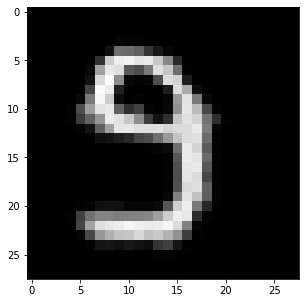

(28, 28)


In [77]:
from PIL import Image
import os

digit_filename = "./9_write.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

print(data.shape)

#### Use the previous tranied neural network

(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 16ms/step


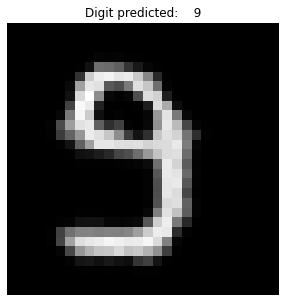

In [78]:
print(data.shape)
data = data.reshape(1,xdim,ydim,1)
print(data.shape)
pred_8 = model_CNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_8)))
plt.axis('off') 
plt.show()

Usando la rete CNN precedentmente creata ho verificato che i numeri scritti a mano tramite il programma GIMP venissero correttamente riconosciuti. In figura viene riportata l'immagine del numero 9 e questo viene efficacemente riconosciuto dalla rete neurale. Riproponendo il procedimento per i restatnti 10 numeri si vede che essi vengono tutti riconosciuti correttamente. 

#### test with a no-number

Image size: 28x28


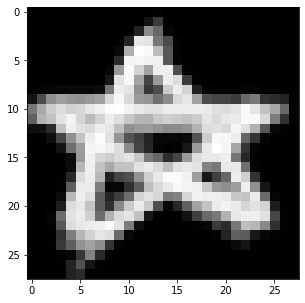

(28, 28)


In [79]:
digit_filename = "./star_write.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

print(data.shape)

(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 18ms/step


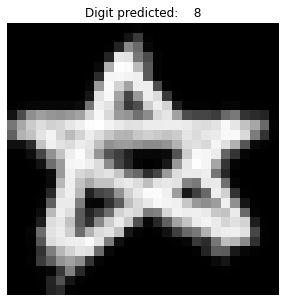

In [80]:
print(data.shape)
data = data.reshape(1,xdim,ydim,1)
print(data.shape)
pred_8 = model_CNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_8)))
plt.axis('off') 
plt.show()

Ho testato la rete per vedere cosa riuscisse a capire di un'immagine contente una figura diversa da un numero, in questo un stella. La rete l'ha catalogata come l'immagine del numero 8 questo molto probabilmente perchè i filtri usati nella reta con layer di convoluzione sono tali da individuare eventuali incroci di righe e associarli all'unico numero con questi incroci ossia il numero 8.

In conclusione la rete neurale CNN creata ed allenata risponde bene all'inserimento di nuove immagini di numeri ed inoltre lo fa mantenendo una elevata accuracy e una bassa loss.